# imports

In [ ]:
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier   # 클래스 (대문자)
from sklearn.metrics import confusion_matrix, classification_report  # 함수, 속성 (소문자)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # 클래스 

# pkg(sklearn) - 디렉토리(폴더)
# module(위에서는 metrics 모듈안에 RMSE, MAE 같은 평가지표가 있음) - py
# pkg.module.class or 함수

# import sklearn
# sklearn.neighbors.KNeighborsClassifier()

# 데이터 준비

Google Drive에 저장된 fish.pickle 파일에서 데이터를 로드 

In [ ]:
file_path = '/content/drive/MyDrive/lab_ml/fish.pickle'

In [ ]:
with open(file_path, mode='rb') as f:
    fish = pickle.load(f)

In [ ]:
type(fish)

dict

In [ ]:
fish.keys()

dict_keys(['data', 'target'])

In [ ]:
fish_data = fish['data']

In [ ]:
fish_data.shape   
# row: 35 beam + 14 smelt
# columns: Weight + Length 

(49, 2)

In [ ]:
fish_data[:5]

array([[242. ,  25.4],
       [290. ,  26.3],
       [340. ,  26.5],
       [363. ,  29. ],
       [430. ,  29. ]])

In [ ]:
fish_label = fish['target']

In [ ]:
fish_label.shape

(49,)

In [ ]:
fish_label[:5]

array([1, 1, 1, 1, 1])

# Train/Test 분리, 훈련, 평가

## 순차적인 sampling 

In [ ]:
num_train = 35  # 훈련 셋의 샘플 개수

In [ ]:
X_train, X_test = fish_data[:num_train], fish_data[num_train:]

In [ ]:
X_train.shape, X_test.shape

((35, 2), (14, 2))

In [ ]:
y_train, y_test = fish_label[:num_train], fish_label[num_train:]

In [ ]:
y_train.shape, y_test.shape

((35,), (14,))

In [ ]:
knn_clf = KNeighborsClassifier()   # kNN 모델 객체 생성 

In [ ]:
knn_clf.fit(X=X_train, y=y_train)  # 35개 훈련 셋으로 모델을 학습시킴 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knn_clf.score(X_train, y_train)   #> 훈련 셋 평가 점수: 1.0(정확도)

1.0

In [ ]:
test_predicts = knn_clf.predict(X_test)  # 14개 테스트 셋 샘플들의 예측값을 계산 

In [ ]:
test_predicts  # 모든 예측값 1(도미, bream)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

**샘플링 편향(sampling bias)**: 훈련 셋과 테스트 셋으로 나눌 때, 훈련 셋이 타겟들을 골고루 갖지 못하고, 특정 타겟이 너무 많이 샘플링 되는 경우

In [ ]:
y_test  # 테스트 셋의 실제 target(레이블)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
knn_clf.score(X_test, y_test)  #> 테스트 셋의 평가 점수(정확도): 0 

0.0

훈련 셋 성능 > 테스트 셋 성능: 과대적합(overfitting) 

## 무작위 샘플링(Random Sampling): 

데이터 셋을 무작위로 섞은 후, 훈련/테스트 셋을 분리

In [ ]:
idx = [0, 1, 2, 3]
np.random.shuffle(idx)
idx

[3, 0, 1, 2]

In [ ]:
np.random.seed(1)
idx = np.arange(49) # [0, 1, 2, ..., 48]
np.random.shuffle(idx)
idx

array([27, 34, 39, 48,  2,  3, 42, 29, 45, 30, 31, 38, 21, 35, 19, 41, 36,
       26, 22, 13, 40, 17, 44, 24, 23,  4, 32, 14, 10, 28, 47, 33, 18, 20,
       25,  6,  7, 46,  1, 16,  0, 15,  5, 11,  9,  8, 12, 43, 37])

In [ ]:
train_idx, test_idx = idx[:num_train], idx[num_train:]

In [ ]:
train_idx

array([27, 34, 39, 48,  2,  3, 42, 29, 45, 30, 31, 38, 21, 35, 19, 41, 36,
       26, 22, 13, 40, 17, 44, 24, 23,  4, 32, 14, 10, 28, 47, 33, 18, 20,
       25])

In [ ]:
test_idx

array([ 6,  7, 46,  1, 16,  0, 15,  5, 11,  9,  8, 12, 43, 37])

In [ ]:
 X_train, X_test = fish_data[train_idx], fish_data[test_idx]

In [ ]:
X_train.shape, X_test.shape

((35, 2), (14, 2))

In [ ]:
y_train, y_test = fish_label[train_idx], fish_label[test_idx]

In [ ]:
y_train.shape, y_test.shape

((35,), (14,))

In [ ]:
y_train

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [ ]:
y_test

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

numpy 배열의 unique한 값의 개수 확인 

In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([11, 24]))

In [ ]:
11/35, 24/35   # 빙어(smelt)와 도미(bream)의 비율

(0.3142857142857143, 0.6857142857142857)

In [ ]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([ 3, 11]))

In [ ]:
3/14, 11/14

(0.21428571428571427, 0.7857142857142857)

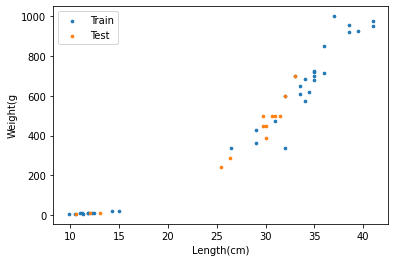

In [ ]:
# 훈련 셋/테스트 셋 시각화 
plt.scatter(X_train[:, 1], X_train[:, 0], label='Train', s=7)
plt.scatter(X_test[:, 1], X_test[:, 0], label='Test', s=7)

plt.legend()
plt.xlabel('Length(cm)')
plt.ylabel('Weight(g')
plt.show()

In [ ]:
knn_clf = KNeighborsClassifier()  # 모델 객체 생성

In [ ]:
knn_clf.fit(X_train, y_train)  # 모델 객체를 훈련 데이터로 학습시킴(fit)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knn_clf.score(X_train, y_train)  # 훈련 셋의 평가 점수(정확도)

1.0

In [ ]:
knn_clf.score(X_test, y_test)  # ㅔㅌ스트 셋의 평가 점수(정확도)

1.0

## 층화 샘플링(Stratified Sampling)

**Stratified Sampling**: 데이터의 타겟의 비율을 훈련/테스트 셋에서도 동일하게 유지하면서 샘플링하는 방법

In [ ]:
# sklearn.model_selection.train_test_split() 함수
X_train, X_test, y_train, y_test = train_test_split(fish_data,       # X_train/X_test로 나뉠 데이터 셋
                                                    fish_label,      # y_train/y_test로 나뉠 타겟
                                                    test_size=0.3,  # 테스트 셋의 비율(0 ~ 1)
                                                    stratify=fish_label, # stratified sampling 기준이 되는 배열
                                                    random_state=1) # 난수 seed

In [ ]:
X_train.shape, X_test.shape

((34, 2), (15, 2))

In [ ]:
y_train.shape, y_test.shape

((34,), (15,))

In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([10, 24]))

In [ ]:
10/34, 24/34   # 훈련 셋에서 빙어:도미의 비율 

(0.29411764705882354, 0.7058823529411765)

In [ ]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([ 4, 11]))

In [ ]:
4/15, 11/15   # 테스트 셋에서 빙어:도미 비율

(0.26666666666666666, 0.7333333333333333)

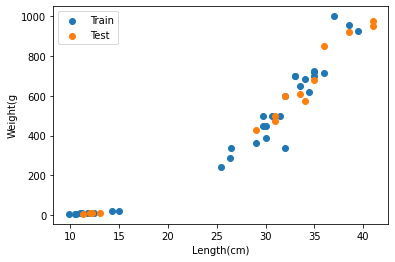

In [ ]:
# 훈련 셋/테스트 셋 시각화 
plt.scatter(X_train[:, 1], X_train[:, 0], label='Train')
plt.scatter(X_test[:, 1], X_test[:, 0], label='Test')

plt.legend()
plt.xlabel('Length(cm)')
plt.ylabel('Weight(g')
plt.show()

In [ ]:
# kNN 모델 생성
knn_clf = KNeighborsClassifier()

In [ ]:
# 훈련 셋으로 모델 학습
knn_clf.fit(X=X_train, y=y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# 훈련 셋 평가
knn_clf.score(X=X_train, y=y_train)

1.0

In [ ]:
# 테스트 셋 평가
knn_clf.score(X=X_test, y=y_test)

1.0

In [ ]:
test_predicts = knn_clf.predict(X=X_test)

In [ ]:
test_predicts

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0])

In [ ]:
test_predicts == y_test  # 테스트 셋의 예측 결과 == 테스트 셋의 실제값 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [ ]:
# 예측값과 실제값을 사용해서 confusion matrix 생성 
confusion_matrix(y_true=y_test, y_pred=test_predicts)

array([[ 4,  0],
       [ 0, 11]])

**분류 문제의 성능 지표**

* 정확도(accuracy): 샘플들을 정확하게 분류한 비율 
> `accuracy = (TN + TP) / (TN + FP + FN + TP)

* 정밀도(precision): 양성 예측의 정확도. 
양성이라고 예측한 샘플들 중에서 정확하게 예측한 비율 
> `precision = TP / (FP + TP)`

* 재현율(recall): 실제 양성 샘플들 중에서 정확하게 예측한 비율 
> `recall = TP / (FN + TP)`

* F1-score: 정밀도와 재현율의 조화 평균
> `f1 = 2 / (1/precision + 1/recall)`

In [ ]:
clf_report = classification_report(y_true=y_test, y_pred=test_predicts, 
                                   labels=[0, 1],
                                   target_names=['Smelt', 'Bream'])
print(clf_report)

              precision    recall  f1-score   support

       Smelt       1.00      1.00      1.00         4
       Bream       1.00      1.00      1.00        11

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



# 데이터 전처리(Data Preprocessing)

## 데이터 스케일링(Scaling)의 필요성

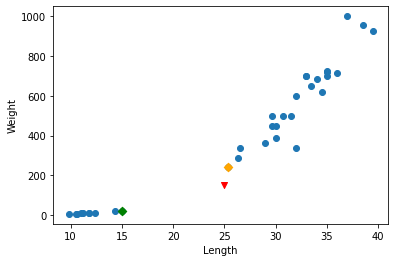

In [ ]:
# 가상의 데이터 (150g, 25cm) 생선 시각화 
plt.scatter(25, 150, marker='v', color='red')

# 학습 셋을 시각화(Weight ~ Length)
plt.scatter(X_train[:, 1], X_train[:, 0])

plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()


In [ ]:
# 훈련시킨 kNN 모델에서 (150g, 25cm) 가상의 생선의 예측값 
test_fish = [[150, 25]]  # (1, 2) shape의 배열
test_pred = knn_clf.predict(X=test_fish)
test_pred
#> 예측 결과: 0 - smelt(빙어)

array([0])

KNeighborsClassifier 클래스 객체(훈련된 kNN 모델)은 k개의 가장 가까운 이웃을 리턴하는 메서드를 가지고 있음 

In [ ]:
distances, neighbor_indices = knn_clf.kneighbors(X=test_fish,
                                                 n_neighbors=5,
                                                 return_distance=True)

In [ ]:
distances   #> (1, 5) shape 2d array: 가장 가까운 이웃 5개까지의 거리들 

array([[135.09629899, 135.80346093, 138.08808783, 139.01165419,
        139.0224802 ]])

In [ ]:
neighbor_indices   #> (1, 5) shape 2d array: 가장 가까운 이웃 5개의 인덱스들(훈련 셋에서의 인덱스) 

array([[18, 33, 26, 13,  6]])

In [ ]:
X_train[neighbor_indices[0]]   # fancy(list) indexing

array([[19.9, 15. ],
       [19.7, 14.3],
       [13.4, 12.4],
       [10. , 11.8],
       [ 9.9, 11.8]])

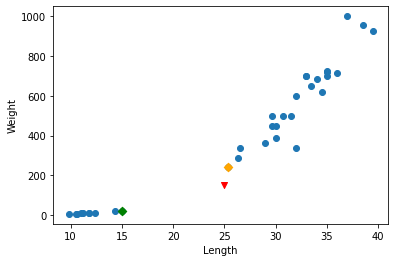

In [ ]:
# 가상의 데이터 (150g, 25cm) 생선 시각화 
plt.scatter(25, 150, marker='v', color='red')

# 학습 셋을 시각화(Weight ~ Length)
plt.scatter(X_train[:, 1], X_train[:, 0])

# 가장 가까운 이웃
plt.scatter(X_train[0, 1], X_train[0, 0], marker='D', color='orange')
# 두번재 가까운 이웃
plt.scatter(X_train[18, 1], X_train[18, 0], marker='D', color='green')

plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

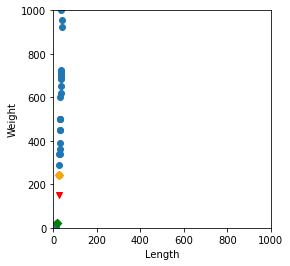

In [ ]:
# 가상의 데이터 (150g, 25cm) 생선 시각화 
plt.scatter(25, 150, marker='v', color='red')

# 학습 셋을 시각화(Weight ~ Length)
plt.scatter(X_train[:, 1], X_train[:, 0])

# 가장 가까운 이웃
plt.scatter(X_train[0, 1], X_train[0, 0], marker='D', color='orange')
# 두번재 가까운 이웃
plt.scatter(X_train[18, 1], X_train[18, 0], marker='D', color='green')

# x축과 y축을 동일한 sacle로
plt.xlim((0, 1_000))
plt.ylim((0, 1_000))
plt.gca().set_aspect('equal')

plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

* 두 특성(길이, 무게)은 서로 단위가 다르기 때문에 값이 있는 범위도 서로 매우 다릅니다. - 두 특성은 스케일이 다르다
    * 두 특성은 스케일이 다르다
* 가장 가까운 이웃을 찾기 위해서 거리를 계산하는데, 생선의 길이는 거의 영향을 미치지 못하고 있다
    * 거리 계산에 영향이 적은 특성들은 무시되기 쉽다 
    * 예측 결과가 부정확해질 수 있다
* kNN과 같이 거리 기반의 알고리즘에서는, 모델을 훈련시키기 위한 모든 특성들은 값이 비슷한 스케일을 갖도록 전처리(preprocessing)을 할 필요가 있다!
    * 표준화(Standardization)
    * 정규화(Normalization)

## 표준화 

모든 특성의 평균을 0으로, 표준편차를 1로 스케일링 

* 훈련 셋에서 각각의 특성 별로 평균과 표준편차를 계산
* 위에서 계산된 평균, 표준편차를 사용해서 훈련 셋과 테스트 셋 모두 표준화를 수행!

In [ ]:
# 훈련 셋의 Weight, Length 특성의 평균 - (2, ) shape의 1d array 또는 (1, 2) shape의 2d array
train_mean = np.mean(X_train, axis=0, keepdims=True)  
train_mean

array([[416.84117647,  26.32941176]])

In [ ]:
# 훈련 셋의 Weight, Length 특성의 표준편차 -  (1, 2) shape의 2d array
train_std = np.std(X_train, axis=0, keepdims=True)
train_std

array([[313.14851214,   9.87085816]])

In [ ]:
# 훈련 셋의 scaling(표준화) - (34, 2) shape의 2d array
X_train_scaled = (X_train - train_mean) / train_std

In [ ]:
X_train_scaled[:5]

array([[-0.55833309, -0.09415714],
       [ 1.71854185,  1.23298178],
       [ 0.26555714,  0.34146861],
       [-1.2998343 , -1.5327352 ],
       [ 0.6487619 ,  0.82774852]])

In [ ]:
np.mean(X_train_scaled, axis=0), np.std(X_train_scaled, axis=0)

(array([-6.53072367e-17, -2.41636776e-16]), array([1., 1.]))

In [ ]:
 # 테스트 셋 scaling(표준화 ):  (15, 2) shape의 2d array
X_test_scaled = (X_test - train_mean) / train_std

In [ ]:
X_test_scaled[:5]

array([[1.70257499, 1.48625256],
       [0.26555714, 0.47316942],
       [0.61682817, 0.72644021],
       [0.04202103, 0.27055279],
       [1.38323769, 0.97971099]])

In [ ]:
# 가상의 테스트 생선 -> 표준화 
test_fish_scaled = (test_fish - train_mean) / train_std
test_fish_scaled

array([[-0.85212341, -0.13468046]])

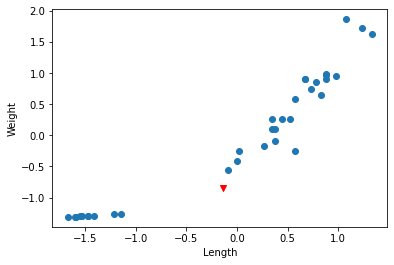

In [ ]:
# 표준화가 적용된 훈련 셋을 시각화
plt.scatter(X_train_scaled[:, 1], X_train_scaled[:, 0])
# test_fish(150g, 25cm) 시각화 
plt.scatter(test_fish_scaled[0, 1], test_fish_scaled[0, 0], marker='v', color='red')

plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

# 표준화를 수행한 훈련 셋으로 모델을 학습/테스트 

In [ ]:
knn_clf = KNeighborsClassifier()  # 모델 생성

In [ ]:
knn_clf.fit(X=X_train_scaled, y=y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
test_pred = knn_clf.predict(X=test_fish_scaled)
test_pred   #> 1 - 도미(Bream)

array([1])

In [ ]:
distances, neighbor_indices = knn_clf.kneighbors(X=test_fish_scaled)

In [ ]:
distances

array([[0.2965719 , 0.46606724, 0.62548147, 0.79175142, 0.91867726]])

In [ ]:
X_train_scaled[neighbor_indices[0]]

array([[-0.55833309, -0.09415714],
       [-0.40505119, -0.00297966],
       [-0.24538254,  0.01728201],
       [-0.17193496,  0.27055279],
       [-0.08571389,  0.37186111]])

In [ ]:
# 스케일링 후 훈련 셋 평가
knn_clf.score(X=X_train_scaled, y=y_train)

1.0

In [ ]:
# 스케일링 후 테스트 셋 평가
knn_clf.score(X=X_test_scaled, y=y_test)

1.0

# sklearn.preprocessing.StandardScaler 

In [ ]:
# StandardScaler 객체 생성 
std_scaler = StandardScaler()

In [ ]:
# 훈련 셋의 평균과 표준편차 계산
std_scaler.fit(X=X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
# 계산된 평균, 표준편차 확인
std_scaler.mean_

array([416.84117647,  26.32941176])

In [ ]:
np.sqrt(std_scaler.var_)

array([313.14851214,   9.87085816])

In [ ]:
# 훈련 셋 표준화
X_train_scaled = std_scaler.transform(X=X_train)

In [ ]:
X_train_scaled[:5]

array([[-0.55833309, -0.09415714],
       [ 1.71854185,  1.23298178],
       [ 0.26555714,  0.34146861],
       [-1.2998343 , -1.5327352 ],
       [ 0.6487619 ,  0.82774852]])

In [ ]:
# 훈련 셋인 경우에는 (1) 평균과 표준편차를 찾고(fit), (2) 데이터를 변환(transform)을 함게 수행하는 
# fit_transform
std_scaler.fit_transform(X=X_train)[:5]

array([[-0.55833309, -0.09415714],
       [ 1.71854185,  1.23298178],
       [ 0.26555714,  0.34146861],
       [-1.2998343 , -1.5327352 ],
       [ 0.6487619 ,  0.82774852]])

**주의**

테스트 셋을 표준화할 때는 훈련 셋의 평균과 표준편차를 사용해야 하기 때문에, `fit_transform()` 메서드를 사용하면 안됨!

테스트 셋에서는 `transform()` 만을 사용해야 함!

In [ ]:
# 테스트 셋 표준화
X_test_scaled = std_scaler.transform(X=X_test)

In [ ]:
X_test_scaled.shape

(15, 2)

In [ ]:
# 테스트 셋을 표준화할 때 fit_transform을 호출?
std_scaler.fit_transform(X=X_test)

#> 항상 훈련 셋으로 평균과 표준편차를 계산해야 한다 

array([[ 1.29660218,  1.16757654],
       [-0.02106312,  0.21832732],
       [ 0.30103284,  0.45563963],
       [-0.22603328,  0.02847748],
       [ 1.00378767,  0.69295193],
       [ 0.506003  ,  0.59802701],
       [ 0.19854776,  0.50310209],
       [-1.45643986, -1.5852462 ],
       [-0.09426675,  0.21832732],
       [ 0.27175139,  0.31325224],
       [-1.44941231, -1.49032127],
       [-1.44941231, -1.56626121],
       [ 1.20875783,  0.93026423],
       [ 1.36980581,  1.16757654],
       [-1.45966082, -1.65169364]])

## Min-Max Normalization (scikit-learn 패키지의 최소-최대 정규화 기능) 

In [ ]:
# 클래스 import
# from sklearn.preprocessing import MinMaxScaler
# 정규화 객체 생성
normalizer = MinMaxScaler()

In [ ]:
# 훈련 셋의 각 특성(weight, length)의 최댓값, 최솟값
np.max(X_train, axis=0), np.min(X_train, axis=0)

(array([1000. ,   39.5]), array([6.7, 9.8]))

In [ ]:
# 훈련 셋 정규화
X_train_normalized = normalizer.fit_transform(X=X_train)

In [ ]:
np.max(X_train_normalized, axis=0), np.min(X_train_normalized, axis=0)

(array([1., 1.]), array([0., 0.]))

In [ ]:
normalizer.data_max_, normalizer.data_min_

(array([1000. ,   39.5]), array([6.7, 9.8]))

In [ ]:
# 테스트 셋 정규화 
X_test_normalized = normalizer.transform(X=X_test)

In [ ]:
X_test_normalized

array([[0.94966274, 1.05050505],
       [0.4966274 , 0.71380471],
       [0.60736937, 0.7979798 ],
       [0.42615524, 0.64646465],
       [0.84898822, 0.88215488],
       [0.67784154, 0.84848485],
       [0.57213329, 0.81481481],
       [0.00312091, 0.07407407],
       [0.47145877, 0.71380471],
       [0.59730192, 0.74747475],
       [0.0055371 , 0.10774411],
       [0.0055371 , 0.08080808],
       [0.91946038, 0.96632997],
       [0.97483137, 1.05050505],
       [0.00201349, 0.05050505]])